# Relax Inc. Data Science Sample Take Home Challenge
This is a practice take home challenge from Relax Inc.

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one of 5 values:
    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest (limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
    * SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving marketing emails
* enabled_for_marketing_drip: whether they are on the regular marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).
2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user adoption .


We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

# Loading Data


In [79]:
import pandas as pd
import numpy as np

users = pd.read_csv('/users/hp/desktop/Ds-springboard/take_home_challenge/relax_challenge/takehome_users.csv', encoding='latin-1',parse_dates=True)
engage = pd.read_csv('/users/hp/desktop/Ds-springboard/take_home_challenge/relax_challenge/takehome_user_engagement.csv', parse_dates=True)

In [80]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [81]:
engage.head(50)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [82]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [83]:
# Fill in missing values
users['last_session_creation_time'].fillna(users['last_session_creation_time'].median(), inplace=True)
users['invited_by_user_id'].fillna(users['invited_by_user_id'].median(), inplace=True)

In [84]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [85]:
A=len(engage.groupby('user_id') ['visited'].nunique())
A

8823

There are 8823 unique user_id


In [86]:
B=len(users.groupby('object_id')['name'].nunique())
B


12000

There are 12000 unique object_id in users data set


In [87]:
#Calculate number of non-users of the application
print(B - A)


3177


In [88]:
#Extract hours from time_stamp and build new column login_date
engage['login_date']=engage['time_stamp'].apply(lambda x:x[:10])
engage.head(3)

,time_stamp,user_id,visited,login_date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29


In [89]:
#Build a function to identify adopted users who are logged into the product on three separate days and assign as adopted=1, else adopted=0

def adapt_user(logins):
    adp=False #flag to check if the user is engaged
    adp_rt=0
    if len(logins)<3:
        return adp_rt
    i=0
    while (~adp) & (i+2<len(logins)):
        first_login_dt=pd.to_datetime(logins.values[i])
        second_login_dt=pd.to_datetime(logins.values[i+1])

       
        while (((first_login_dt-second_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            second_login_dt=pd.to_datetime(logins.values[i+1])
        third_login_dt=pd.to_datetime(logins.values[i+2])
        
        #find if third login date is not the same day as the second day
        while (((second_login_dt-third_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            third_login_dt=pd.to_datetime(logins.values[i+1])
        
        #check if the diff between three successive login is less than 7 days
        if ((third_login_dt-first_login_dt).days) < 7:
            adp=True
            adp_rt=1
        i=i+1

    return adp_rt

In [90]:
# Build a data set consisting user_id and login_df only
user_eng=engage[['user_id','login_date']].groupby('user_id')

In [91]:
#Build a dictionary to create user and adapted columns
usr_eng_dict={}
for i in user_eng:
    user=i[1]['user_id'].iloc[0]
    login_times=i[1]['login_date']
    usr_eng_dict[user]=adapt_user(login_times)

In [92]:
usr_eng_df=pd.DataFrame(pd.Series(usr_eng_dict)).reset_index()


In [93]:
usr_eng_df.columns=['user_id','adopted']
usr_eng_df.head()

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [94]:
users=users.set_index('object_id')


In [95]:
usr_eng_df= usr_eng_df.set_index('user_id')


In [96]:
data=pd.concat([users,usr_eng_df],axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       8823 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.0+ MB


In [97]:
data['adopted']=data['adopted'].fillna(0)


In [98]:
print(sum(data['adopted']))
print(sum(data.adopted)/len(data.adopted))

1602.0
0.1335


So it appears that there are only 1602 active users in the dataframe, about 14% of the total users. 

# Data Wrangling


In [99]:
#percentage of engaged users by email opt in
data[['opted_in_to_mailing_list','adopted']].groupby('opted_in_to_mailing_list')['adopted'].mean()


opted_in_to_mailing_list
0    0.131912
1    0.138277
Name: adopted, dtype: float64

13.82% of adopted users are opted in for emails.

In [100]:
#percentage of engaged users by marketing opt in
data[['enabled_for_marketing_drip','adopted']].groupby('enabled_for_marketing_drip')['adopted'].mean()

enabled_for_marketing_drip
0    0.132837
1    0.137277
Name: adopted, dtype: float64

13.72% of adopted users participate in the regular marketing email drip.



In [101]:
#percentage of engaged users by creation source
data[['creation_source','adopted']].groupby('creation_source')['adopted'].mean()


creation_source
GUEST_INVITE          0.166436
ORG_INVITE            0.129995
PERSONAL_PROJECTS     0.077688
SIGNUP                0.140393
SIGNUP_GOOGLE_AUTH    0.167509
Name: adopted, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

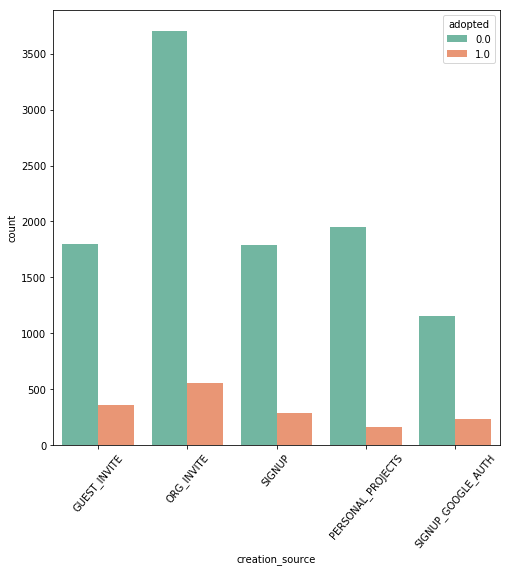

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt



plt.figure(figsize=(8,8))

g =sns.countplot(x="creation_source", data=data, hue='adopted', palette="Set2")
plt.xticks(rotation = 50)



People with Personal Projects are extremely less likely to be an adopted user as compared to other creation source methods. But since this does not help us in identifying adopted users, this too, isn't a very useful feature.



Here is the percentage of being potential adapted people from categories under creation_source There is 17% likely that a person being invited to an organization as a guest will be adapted. There is 13% likely that a person being invited to an organization as a full member will be adapted.


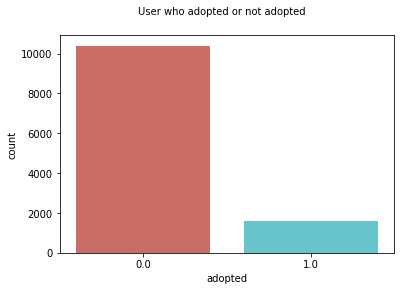

In [103]:
#See the countplot for number of users who identified as adopted or not.

plt.suptitle("User who adopted or not adopted", fontsize=10)
sns.countplot(x='adopted', data=data, palette='hls')
plt.show()


In [104]:
# Count the number of attrition or number of no attrition
print("Total records: ", len(data))
print("Records for adopted user,'Yes',: ", sum(data.adopted == 1))
print("Records for non-adopted user,'No',: ", sum(data.adopted == 0))


Total records:  12000
Records for adopted user,'Yes',:  1602
Records for non-adopted user,'No',:  10398


As seen from the count plot above, there is a big gap between '0' and '1' values of binary response, 'adopted'. Thus, an up sample for minority class, '1' in our data, will be apply in order to reinforce its signal. Then, a new data frame consisting of up-sampled minority class will be created.



In [105]:
from sklearn.utils import resample #import the resampling module from Scikit-Learn
# Separate majority and minority classes
df_majority = data[data.adopted==0]
df_minority = data[data.adopted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10398,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.adopted.value_counts()

1.0    10398
0.0    10398
Name: adopted, dtype: int64

# Data Modelling¶


In [106]:
#Encode categorical 'creation' feature as dummy code.
data_encod = pd.get_dummies(df_upsampled, columns = ['creation_source'])

data_encod.head()


,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,0.0,1,0,0,0,0


In [107]:
#Delete data having non-numeric observation.
cols = ["creation_time", "name", "email", "org_id",'invited_by_user_id']
for i in cols:
    del data_encod[i]


## Random Forest¶


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = data_encod.adopted
X = data_encod.drop('adopted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
#Calculate Accuracy Score for Random Forest
from sklearn.metrics import accuracy_score
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(accuracy)


0.959222927486055


Accuracy score for Random Forest is 96%.



In [110]:
ypred = model.predict(X_test)


In [111]:
#Classification Report for Random Forest
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2389
         1.0       1.00      0.93      0.96      2810

   micro avg       0.96      0.96      0.96      5199
   macro avg       0.96      0.96      0.96      5199
weighted avg       0.96      0.96      0.96      5199



According to the recall score, 93% of 97% of users retrieved as adopted users.



## Feature Importance¶


/Users/hp/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.9277, 'last_session_creation_time'), (0.0148, 'opted_in_to_mailing_list'), (0.012, 'enabled_for_marketing_drip'), (0.0101, 'adopted'), (0.0096, 'creation_source_GUEST_INVITE'), (0.009, 'creation_source_PERSONAL_PROJECTS'), (0.0087, 'creation_source_SIGNUP'), (0.0082, 'creation_source_ORG_INVITE')]
Feature ranking:
1. feature 0 (0.973186)
2. feature 5 (0.011057)
3. feature 2 (0.003713)
4. feature 1 (0.003584)
5. feature 3 (0.002858)
6. feature 7 (0.002274)
7. feature 4 (0.001756)
8. feature 6 (0.001573)
1. feature 0 (0.973186)
2. feature 5 (0.011057)
3. feature 2 (0.003713)
4. feature 1 (0.003584)
5. feature 3 (0.002858)
6. feature 7 (0.002274)
7. feature 4 (0.001756)
8. feature 6 (0.001573)


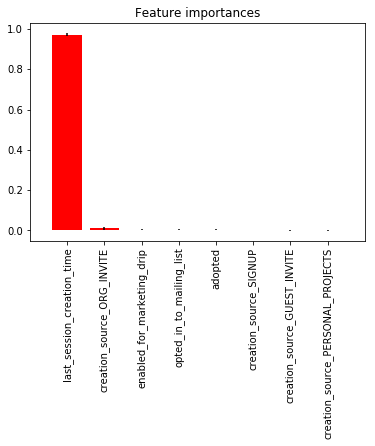

In [112]:
# Explore feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
names = data_encod.columns.values

rf = RandomForestRegressor()
rf.fit(X, y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             
             reverse=True))

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
for f in range(X.shape[1]):
    indices = np.argsort(importances)[::-1]
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()
